In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'ETT-small/ETTm2.csv', index_col=0)

In [4]:
etth1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001


In [5]:
etth1.shape

(69680, 7)

<Axes: xlabel='date'>

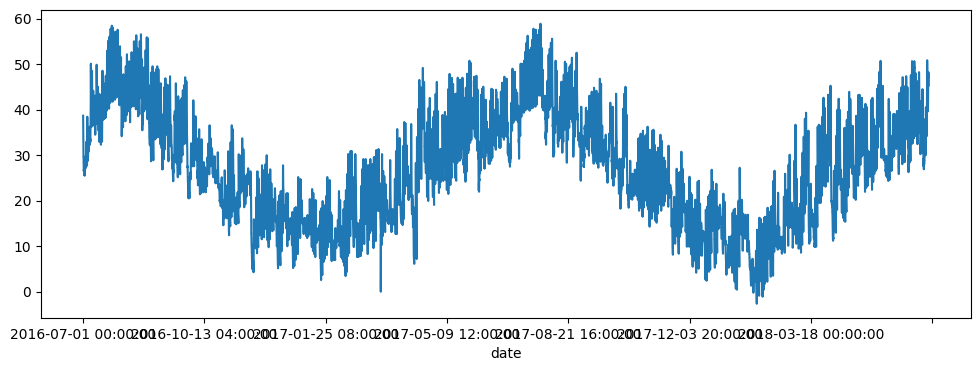

In [6]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

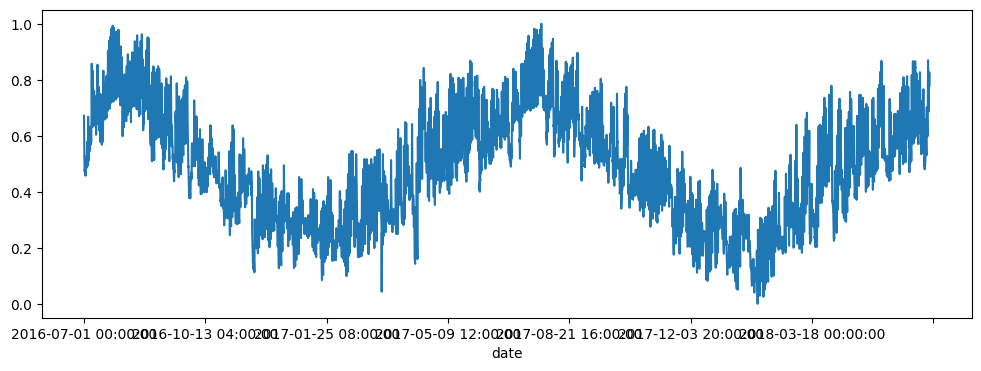

In [8]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [9]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1684360893
Epoch 2, Boundaries delta: 0.0664775299, Codewords delta: 0.0478953559
Epoch 3, Boundaries delta: 0.0437355745, Codewords delta: 0.0361056921
Epoch 4, Boundaries delta: 0.0322812431, Codewords delta: 0.0276651420
Epoch 5, Boundaries delta: 0.0244328195, Codewords delta: 0.0214106787
Epoch 6, Boundaries delta: 0.0186750855, Codewords delta: 0.0168082145
Epoch 7, Boundaries delta: 0.0147256918, Codewords delta: 0.0134379082
Epoch 8, Boundaries delta: 0.0119107760, Codewords delta: 0.0109180404
Epoch 9, Boundaries delta: 0.0099828935, Codewords delta: 0.0093088951
Epoch 10, Boundaries delta: 0.0087898692, Codewords delta: 0.0082472243
Epoch 11, Boundaries delta: 0.0079201322, Codewords delta: 0.0073536396
Epoch 12, Boundaries delta: 0.0071701103, Codewords delta: 0.0065997931
Epoch 13, Boundaries delta: 0.0065249807, Codewords delta: 0.0059619866
Epoch 14, Boundaries delta: 0.0059606176, Codewords delta: 0.0055047983
E

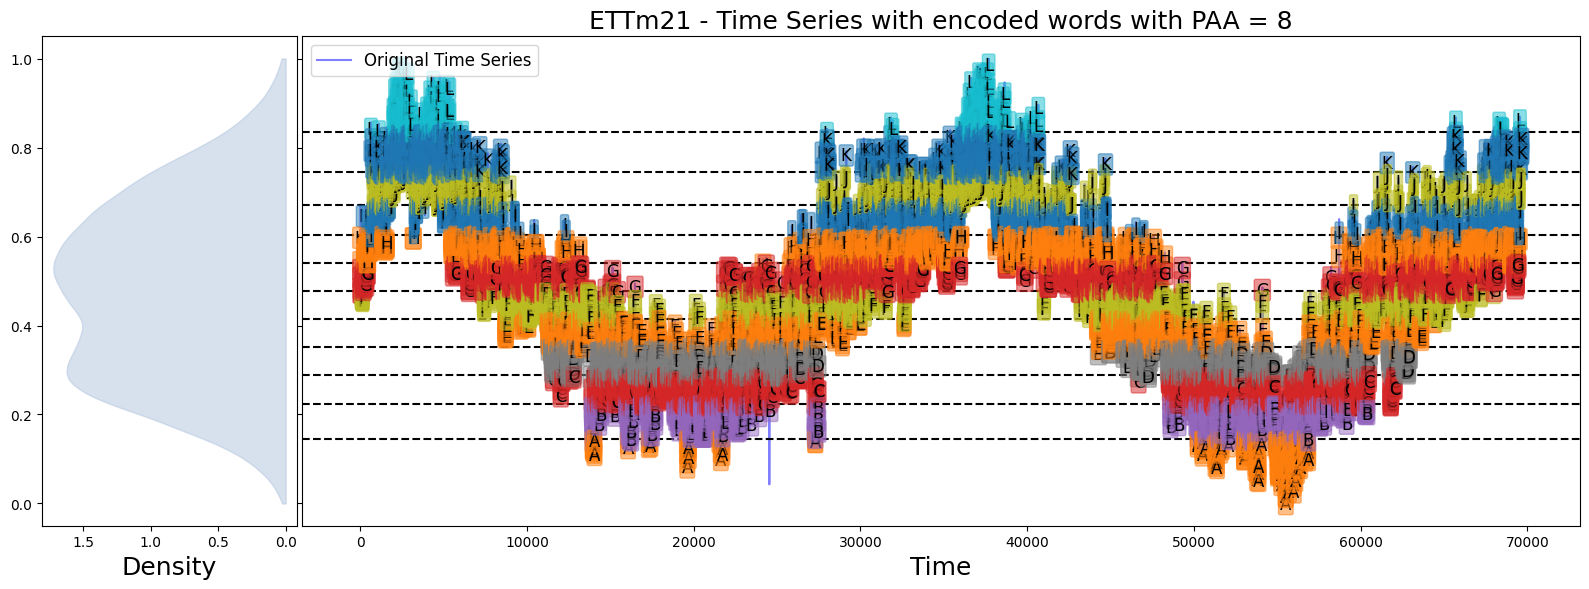

In [15]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm2_ksax.png", data_name='ETTm21')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm2_ksax.csv")

### Stationary

In [10]:
target = scaled_etth1
target = target.diff().dropna()

In [11]:
target.head()

date
2016-07-01 00:15:00   -0.007135
2016-07-01 00:30:00   -0.014287
2016-07-01 00:45:00   -0.003576
2016-07-01 01:00:00    0.000000
2016-07-01 01:15:00   -0.003576
dtype: float64

In [ ]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm2_stationary_ksax.png", data_name='ETTm2-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm2_stationary_ksax.csv")

Epoch 1, Boundaries delta: 0.1367194864, Codewords delta: 0.1506952691
Epoch 2, Boundaries delta: 0.0512538147, Codewords delta: 0.0363757831
Epoch 3, Boundaries delta: 0.0358712242, Codewords delta: 0.0173952700
Epoch 4, Boundaries delta: 0.0174489173, Codewords delta: 0.0113821398
Epoch 5, Boundaries delta: 0.0107450446, Codewords delta: 0.0085040580
Epoch 6, Boundaries delta: 0.0078006923, Codewords delta: 0.0064792119
Epoch 7, Boundaries delta: 0.0058747711, Codewords delta: 0.0050184195
Epoch 8, Boundaries delta: 0.0045908034, Codewords delta: 0.0039443048
Epoch 9, Boundaries delta: 0.0036323025, Codewords delta: 0.0031407443
Epoch 10, Boundaries delta: 0.0029048353, Codewords delta: 0.0025546958
Epoch 11, Boundaries delta: 0.0023528690, Codewords delta: 0.0021465590
Epoch 12, Boundaries delta: 0.0019779829, Codewords delta: 0.0018218844
Epoch 13, Boundaries delta: 0.0017434348, Codewords delta: 0.0016004231
Epoch 14, Boundaries delta: 0.0015599764, Codewords delta: 0.0014168024
E